<font size = 6 color='indigo'>APS 1</font>

Gabriella Cukier e Manuel Castañares

## Importando Bibliotecas

In [1]:
import pandas as pd
from graph_tool import Graph
import csv
import netpixi
from netpixi.data.gt import *

## Database

In [2]:
df = pd.read_csv('ATP Dataset_2012-01 to 2017-07_Int.csv')
df

,ATP,Tournament,Tournament_Int,Date,Series,Series_Int,Court,Court_Int,Surface,Surface_Int,...,Winner,Winner_Int,Player1,Player1_Int,Player2,Player2_Int,Player1_Rank,Player2_Rank,Player1_Odds,Player2_Odds
0,1,BrisbaneInternational,1.2757,1/1/17,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,ThompsonJ.,6.7926,ThompsonJ.,6.7926,YmerE.,6.0375,79.0,160.0,1.29,3.50
1,1,BrisbaneInternational,1.2757,1/2/17,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,MahutN.,6.9297,MahutN.,6.9297,RobertS.,6.9152,39.0,54.0,1.54,2.43
2,1,BrisbaneInternational,1.2757,1/2/17,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,FerrerD.,6.3881,FerrerD.,6.3881,TomicB.,6.6345,21.0,26.0,2.01,1.77
3,1,BrisbaneInternational,1.2757,1/2/17,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,EdmundK.,6.8384,EdmundK.,6.8384,EscobedoE.,6.1645,45.0,141.0,1.37,3.01
4,1,BrisbaneInternational,1.2757,1/2/17,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,DimitrovG.,6.5157,DimitrovG.,6.5157,JohnsonS.,6.1087,17.0,33.0,1.41,2.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14741,65,MastersCup,1.7532,11/10/12,MastersCup,2.7079,Indoor,3.2579,Hard,4.4983,...,DelPotroJ.M.,6.0310,DelPotroJ.M.,6.0310,FedererR.,6.7289,7.0,2.0,2.82,1.42
14742,65,MastersCup,1.7532,11/10/12,MastersCup,2.7079,Indoor,3.2579,Hard,4.4983,...,FerrerD.,6.3881,FerrerD.,6.3881,TipsarevicJ.,6.0563,5.0,9.0,1.20,4.55
14743,65,MastersCup,1.7532,11/11/12,MastersCup,2.7079,Indoor,3.2579,Hard,4.4983,...,DjokovicN.,6.9457,DjokovicN.,6.9457,DelPotroJ.M.,6.2204,1.0,7.0,1.22,4.28
14744,65,MastersCup,1.7532,11/11/12,MastersCup,2.7079,Indoor,3.2579,Hard,4.4983,...,FedererR.,6.9997,FedererR.,6.9997,MurrayA.,6.2109,2.0,3.0,2.16,1.68


## Criando uma rede baseada nesse dataset

In [29]:
g = Graph(directed=True) # grafo dirigido

O primeiro passo para separar os jogadores foi filtrar todas as partidas de 2015:

In [30]:
players2015=[]
with open('ATP Dataset_2012-01 to 2017-07_Int.csv') as file:
    reader = csv.reader(file, delimiter=',', quotechar='"')
    i = 0;
    for row in reader:
        i += 1
        if row[3][-2:] == "15" :
            players2015.append(row)

In [31]:
numeroPartidas = len(players2015)
print(f"Número de partidas em 2015: {numeroPartidas}")

Número de partidas em 2015: 2630


Em seguida, os jogadores que disputaram partidas em 2015 foram filtrados e um vértice foi criado para cada um, com um atributo que representa o nome do jogador respectivo:

In [32]:
def add_player(i,v,count,column):
    g.add_vertex()
    v = g.vertex(count)
    lista_players.append(players2015[i][column])
    g.vp['nome'][v] = players2015[i][column]
    count+=1

In [33]:
lista_players = []
count = 0
g.vp['nome'] = g.new_vp('object')
for i in range(numeroPartidas):
    
    if players2015[i][15] not in lista_players:
        add_player(i,v,count,15)
        
    if players2015[i][17] not in lista_players:
        add_player(i,v,count,17)
            
print('número de vértices de g:', g.num_vertices())

número de vértices de g: 284


Em seguida as arestas foram criadas, sendo que uma aresta(n,m) existe se n venceu m uma ou mais vezes em 2015. Além disso, foi definido que 
cada aresta deve ter um atributo que representa o número de vitórias em 2015.


In [7]:
jaForam = []
g.ep['vitorias'] = g.new_ep('object')
c=0
for i in range(numeroPartidas):
    
    for j in  range(g.num_vertices()):
        v = g.vertex(j)
        if players2015[i][15] == g.vp['nome'][v]:
            player1 = j
        if players2015[i][17] == g.vp['nome'][v]:
            player2 = j
        
    if players2015[i][15] == players2015[i][13]: #se o Player1 for o vencedor
        tupla = (player1, player2)
        if tupla not in jaForam:
            g.add_edge(player1, player2)
            e = g.edge(player1, player2)
            g.ep['vitorias'][e] = 1
            jaForam.append(tupla)
        else:
            e = g.edge(player1, player2)
            if g.ep['vitorias'][e]  is not None:
                g.ep['vitorias'][e] += 1
                c+=1
    else:
        tupla = (player2, player1)
        if tupla not in jaForam:
            g.add_edge(player2, player1)
            e = g.edge(player2, player1)
            g.ep['vitorias'][e] = 1
            jaForam.append(tupla)
        else:
            e = g.edge(player2, player1)
            if g.ep['vitorias'][e]  is not None:
                g.ep['vitorias'][e] += 1
                c+=1
  
print('Número de arestas de g:', g.num_edges())

Número de arestas de g: 2312


## Análise exploratória do grafo

### Número de vértices

In [8]:
n = g.num_vertices()
n

284

### Número de arestas

In [9]:
m = g.num_edges()
m

2312

### Máximo possível de arestas

In [10]:
max_edges = n * (n - 1) # Pois o grafo é dirigido
max_edges

80372

### Densidade

In [11]:
d = m / max_edges
d

0.02876623699795949

### Propriedades dos vértices


In [12]:
df = pd.DataFrame({k: list(v) for k, v in g.vp.items()})
df

,nome
0,DuckworthJ.
1,SimonG.
2,KokkinakisT.
3,BenneteauJ.
4,ChardyJ.
...,...
279,ZhangZh.
280,KaratsevA.
281,YmerM.
282,MiedlerL.


### Degrees

In [13]:
in_degrees = []
for v in g.vertices():
    in_degrees.append(v.in_degree())

out_degrees = []
for v in g.vertices():
    out_degrees.append(v.out_degree())

degrees = []
for indeg, outdeg in zip(in_degrees, out_degrees):
    degrees.append(indeg + outdeg)

In [14]:
df['degree'] = degrees
df['in_degrees'] = in_degrees
df['out_degrees'] = out_degrees
df

,nome,degree,in_degrees,out_degrees
0,DuckworthJ.,19,10,9
1,SimonG.,52,19,33
2,KokkinakisT.,25,14,11
3,BenneteauJ.,6,5,1
4,ChardyJ.,49,23,26
...,...,...,...,...
279,ZhangZh.,2,1,1
280,KaratsevA.,2,1,1
281,YmerM.,1,1,0
282,MiedlerL.,1,1,0


### Estatística e histograma do in-degree

count    284.000000
mean       8.140845
std        7.639947
min        1.000000
25%        1.000000
50%        5.000000
75%       14.000000
max       25.000000
Name: in_degrees, dtype: float64

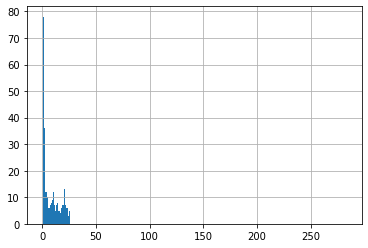

In [15]:
df['in_degrees'].hist(bins=range(n))
df['in_degrees'].describe()

### Estatística e histograma do out-degree

count    284.000000
mean       8.140845
std       11.417606
min        0.000000
25%        0.000000
50%        2.000000
75%       13.250000
max       47.000000
Name: out_degrees, dtype: float64

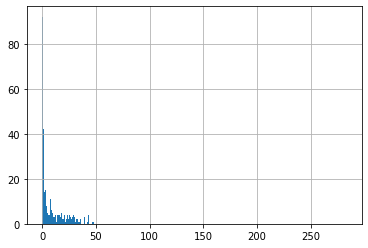

In [16]:
df['out_degrees'].hist(bins=range(n))
df['out_degrees'].describe()

### Estatística e histograma do degree

count    284.000000
mean      16.281690
std       17.911587
min        1.000000
25%        2.000000
50%        6.500000
75%       31.250000
max       61.000000
Name: degree, dtype: float64

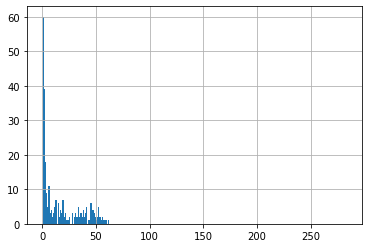

In [17]:
df['degree'].hist(bins=range(n))
df['degree'].describe()

## Análise visual do grafo

### Salvando o grafo em um arquivo

In [18]:
save_gt(g, '../grafo.net.gz')

### Abrindo uma visualização a partir do arquivo

### Fazendo a visualização mostrar os nomes dos jogadores

In [19]:
# Posicionando os vértices de acordo com um algoritmo 
#baseado em force-directed graph drawing, 
#para evidenciar “panelinhas”

g = load_gt('../grafo.net.gz')
m = draw_gt.sfdp_layout(g)
move_gt(g, m)
save_gt(g, 'grafo.net.gz')

In [20]:
r = netpixi.render('grafo.net.gz')

In [34]:
# mudar a cor de fundo do grafo
r.graph(color=0xffffff)

# mudar a cor e o tamanho dos vértices
r.vertex_default(color=0x000000, size=5)

# mudar a cor, a espessura e a curvatura das arestas
r.edge_default(color=0x000000, width=0.1, curve1=0, curve2=0)

In [35]:
r.vertex_set_key('nome')  # para mostrar os nomes dos jogadores

In [36]:
netpixi.peek('grafo.net.gz')

GRAPH
    directed: bool
VERTEX
    nome: str
EDGE
    vitorias: int


In [24]:
save_gt(g, 'exemplo.net.gz')